# EDA
Just taking a peak at the dataset


In [45]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

# ensure changes in files are reflected
%load_ext autoreload
%autoreload 2
# Set display options to show all columns
pd.set_option('display.max_columns', None)  # Show all columns

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [46]:
df = pd.read_csv("../data/processed/3yr_dataset_train.csv")
df.shape

(535, 12)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 535 entries, 0 to 534
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   application_number          535 non-null    object 
 1   avg_targeted_affordability  535 non-null    float64
 2   total_points                535 non-null    float64
 3   tie_breaker_self_score      535 non-null    float64
 4   bond_request_amount         535 non-null    float64
 5   num_homeless_units          535 non-null    float64
 6   construction_type           535 non-null    object 
 7   housing_type                535 non-null    object 
 8   CDLAC_region                535 non-null    object 
 9   combined_CDLAC_pool         535 non-null    object 
 10  combined_set_aside          535 non-null    object 
 11  award                       535 non-null    object 
dtypes: float64(5), object(7)
memory usage: 50.3+ KB


In [48]:
df.dtypes

application_number             object
avg_targeted_affordability    float64
total_points                  float64
tie_breaker_self_score        float64
bond_request_amount           float64
num_homeless_units            float64
construction_type              object
housing_type                   object
CDLAC_region                   object
combined_CDLAC_pool            object
combined_set_aside             object
award                          object
dtype: object

In [49]:
df.describe()

,avg_targeted_affordability,total_points,tie_breaker_self_score,bond_request_amount,num_homeless_units
count,535.000000,535.000000,535.000000,5.350000e+02,535.000000
mean,0.495059,116.114019,1.008443,3.611271e+07,11.555140
std,0.082374,6.811541,0.396010,2.137147e+07,23.983145
min,0.260294,90.000000,0.332724,2.072500e+06,0.000000
25%,0.438651,119.000000,0.728396,2.101584e+07,0.000000
50%,0.498413,119.000000,0.906379,3.295789e+07,0.000000
75%,0.579227,120.000000,1.211463,4.572648e+07,11.000000
max,0.600000,120.000000,2.708276,1.712967e+08,146.000000


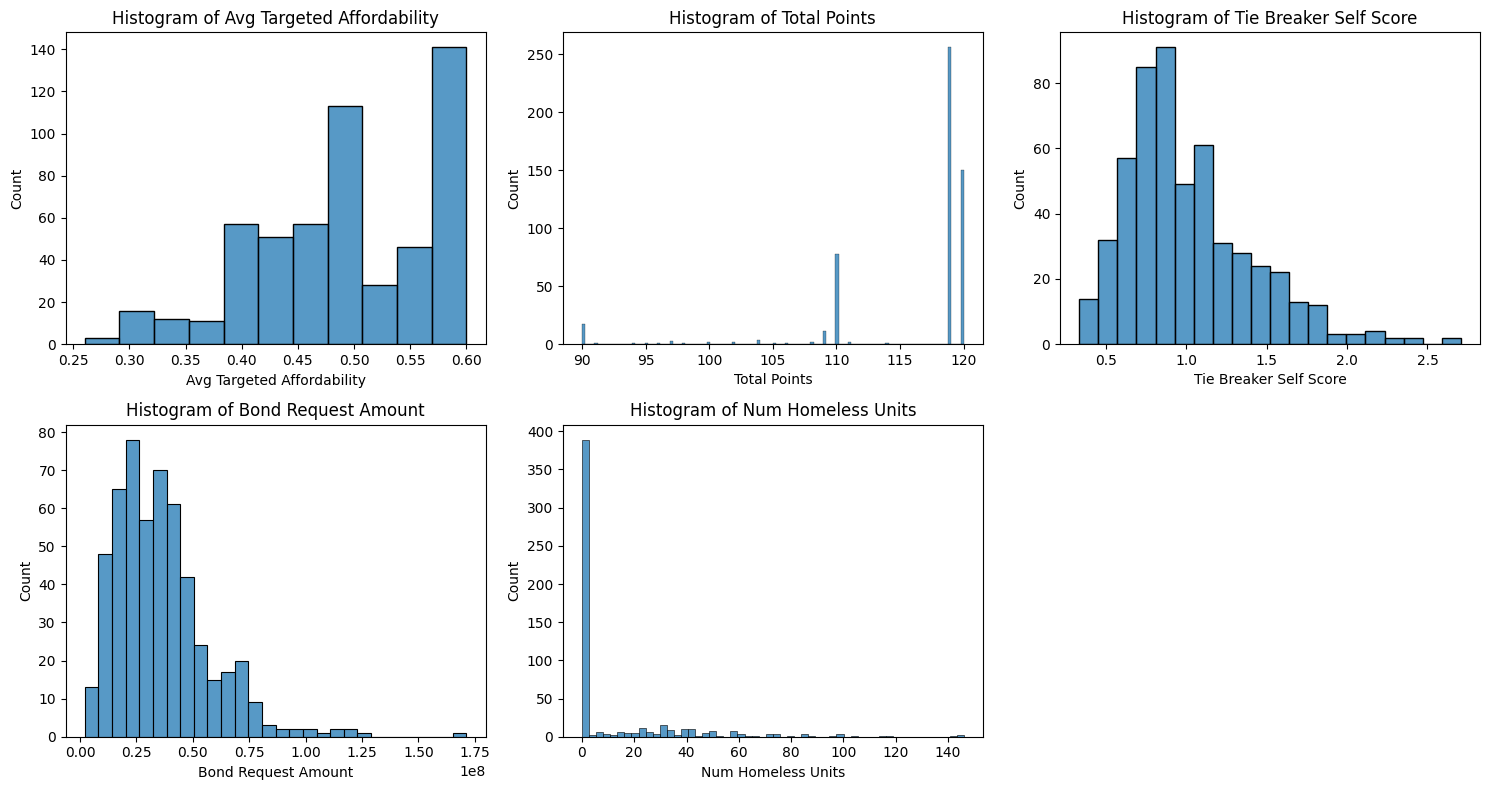

In [50]:
# Define the features to plot
numeric = ['avg_targeted_affordability', 'total_points', 'tie_breaker_self_score', 
            'bond_request_amount', 'num_homeless_units']

# Create a figure with subplots (2 rows, 3 columns to accommodate 5 features)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

# Flatten axes array for easier iteration (since we have 5 plots, not 6)
axes = axes.flatten()

# Plot a histogram for each feature
for i, feature in enumerate(numeric):
    sb.histplot(data=df, x=feature, ax=axes[i])
    axes[i].set_xlabel(feature.replace('_', ' ').title())  # Nicer label
    axes[i].set_ylabel('Count')
    axes[i].set_title(f'Histogram of {feature.replace("_", " ").title()}')

# Remove the empty subplot (if any)
for j in range(len(numeric), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

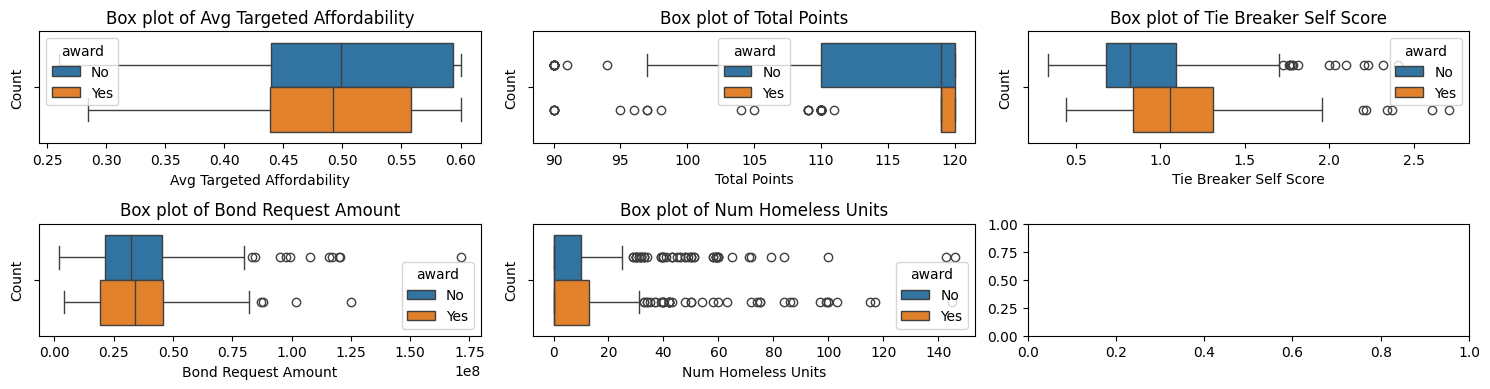

In [51]:

# Create a figure with subplots (2 rows, 3 columns to accommodate 5 features)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 4))

# Flatten axes array for easier iteration (since we have 5 plots, not 6)
axes = axes.flatten()
# Plot a histogram for each feature
for i, feature in enumerate(numeric):
    sb.boxplot(data=df, x=feature, orient='h', hue = 'award', ax=axes[i])
    axes[i].set_xlabel(feature.replace('_', ' ').title())  # Nicer label
    axes[i].set_ylabel('Count')
    axes[i].set_title(f'Box plot of {feature.replace("_", " ").title()}')



# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

## notes on histogram and box plots for numeric data
Some things to note:
- distributions seem very similar to the 2025 R1 analysis 
- The total points and self score are higher on average for the awarded projects. 
- Homeless units doesn't seem to be a good feature

In [52]:
df[numeric].corr()

,avg_targeted_affordability,total_points,tie_breaker_self_score,bond_request_amount,num_homeless_units
avg_targeted_affordability,1.000000,-0.017011,-0.090760,0.144679,-0.503087
total_points,-0.017011,1.000000,-0.464164,0.068734,0.206546
tie_breaker_self_score,-0.090760,-0.464164,1.000000,-0.083366,-0.018778
bond_request_amount,0.144679,0.068734,-0.083366,1.000000,0.114062
num_homeless_units,-0.503087,0.206546,-0.018778,0.114062,1.000000


<Axes: >

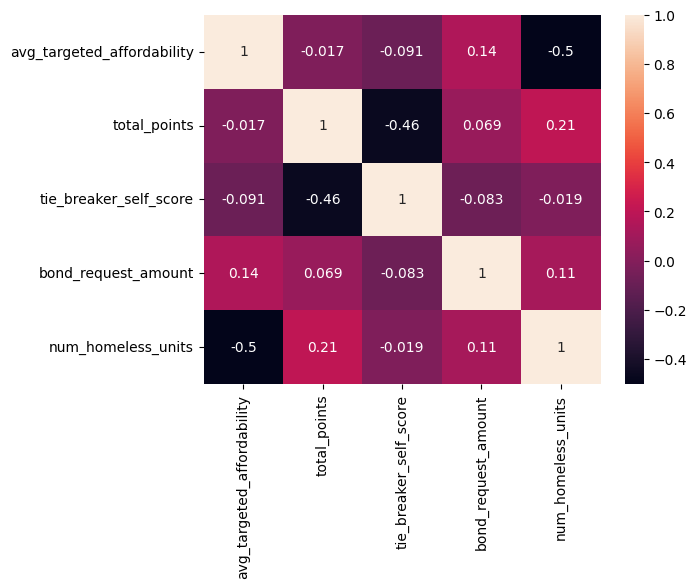

In [53]:

sb.heatmap(df[numeric].corr(), annot=True)

array([[<Axes: xlabel='avg_targeted_affordability', ylabel='avg_targeted_affordability'>,
        <Axes: xlabel='total_points', ylabel='avg_targeted_affordability'>,
        <Axes: xlabel='tie_breaker_self_score', ylabel='avg_targeted_affordability'>,
        <Axes: xlabel='bond_request_amount', ylabel='avg_targeted_affordability'>,
        <Axes: xlabel='num_homeless_units', ylabel='avg_targeted_affordability'>],
       [<Axes: xlabel='avg_targeted_affordability', ylabel='total_points'>,
        <Axes: xlabel='total_points', ylabel='total_points'>,
        <Axes: xlabel='tie_breaker_self_score', ylabel='total_points'>,
        <Axes: xlabel='bond_request_amount', ylabel='total_points'>,
        <Axes: xlabel='num_homeless_units', ylabel='total_points'>],
       [<Axes: xlabel='avg_targeted_affordability', ylabel='tie_breaker_self_score'>,
        <Axes: xlabel='total_points', ylabel='tie_breaker_self_score'>,
        <Axes: xlabel='tie_breaker_self_score', ylabel='tie_breaker_self_sco

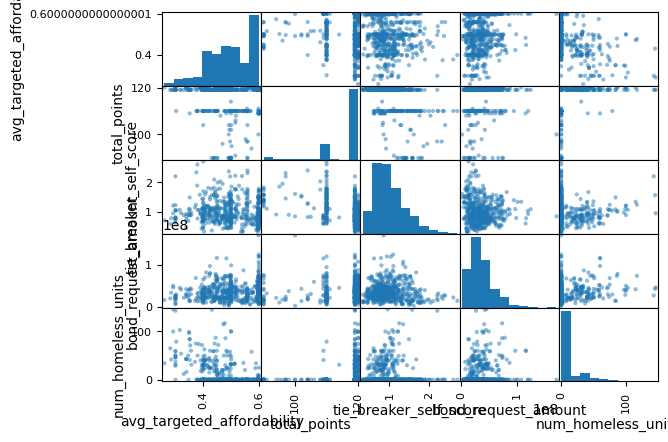

In [54]:
pd.plotting.scatter_matrix(df[numeric])

In [55]:
df.columns

Index(['application_number', 'avg_targeted_affordability', 'total_points',
       'tie_breaker_self_score', 'bond_request_amount', 'num_homeless_units',
       'construction_type', 'housing_type', 'CDLAC_region',
       'combined_CDLAC_pool', 'combined_set_aside', 'award'],
      dtype='object')

In [56]:
categorical = ['construction_type', 'housing_type', 'CDLAC_region',
       'combined_CDLAC_pool', 'combined_set_aside']


construction_type
NEW CONSTRUCTION    411
ACQ AND REHAB       111
ADAPTIVE REUSE       10
REHABILITATION        3
Name: count, dtype: int64
housing_type
Large Family     255
Non-Targeted     150
Special Needs     62
Seniors           52
At-Risk           14
SRO                2
Name: count, dtype: int64
CDLAC_region
BAY AREA                156
COASTAL                 118
NORTHERN                 68
INLAND                   59
CITY OF LA               57
BALANCE OF LA COUNTY     50
NONE                     27
Name: count, dtype: int64
combined_CDLAC_pool
NEW CONSTRUCTION        347
OTHER REHABILITATION     87
RURAL                    39
BIPOC                    35
PRESERVATION             26
BIPOC/PRESERVATION        1
Name: count, dtype: int64
combined_set_aside
NONE                 298
HOMELESS, ELI/VLI    111
ELI/VLI              102
MIP                   17
HOMELESS               5
MIP, ELI/VLI           2
Name: count, dtype: int64


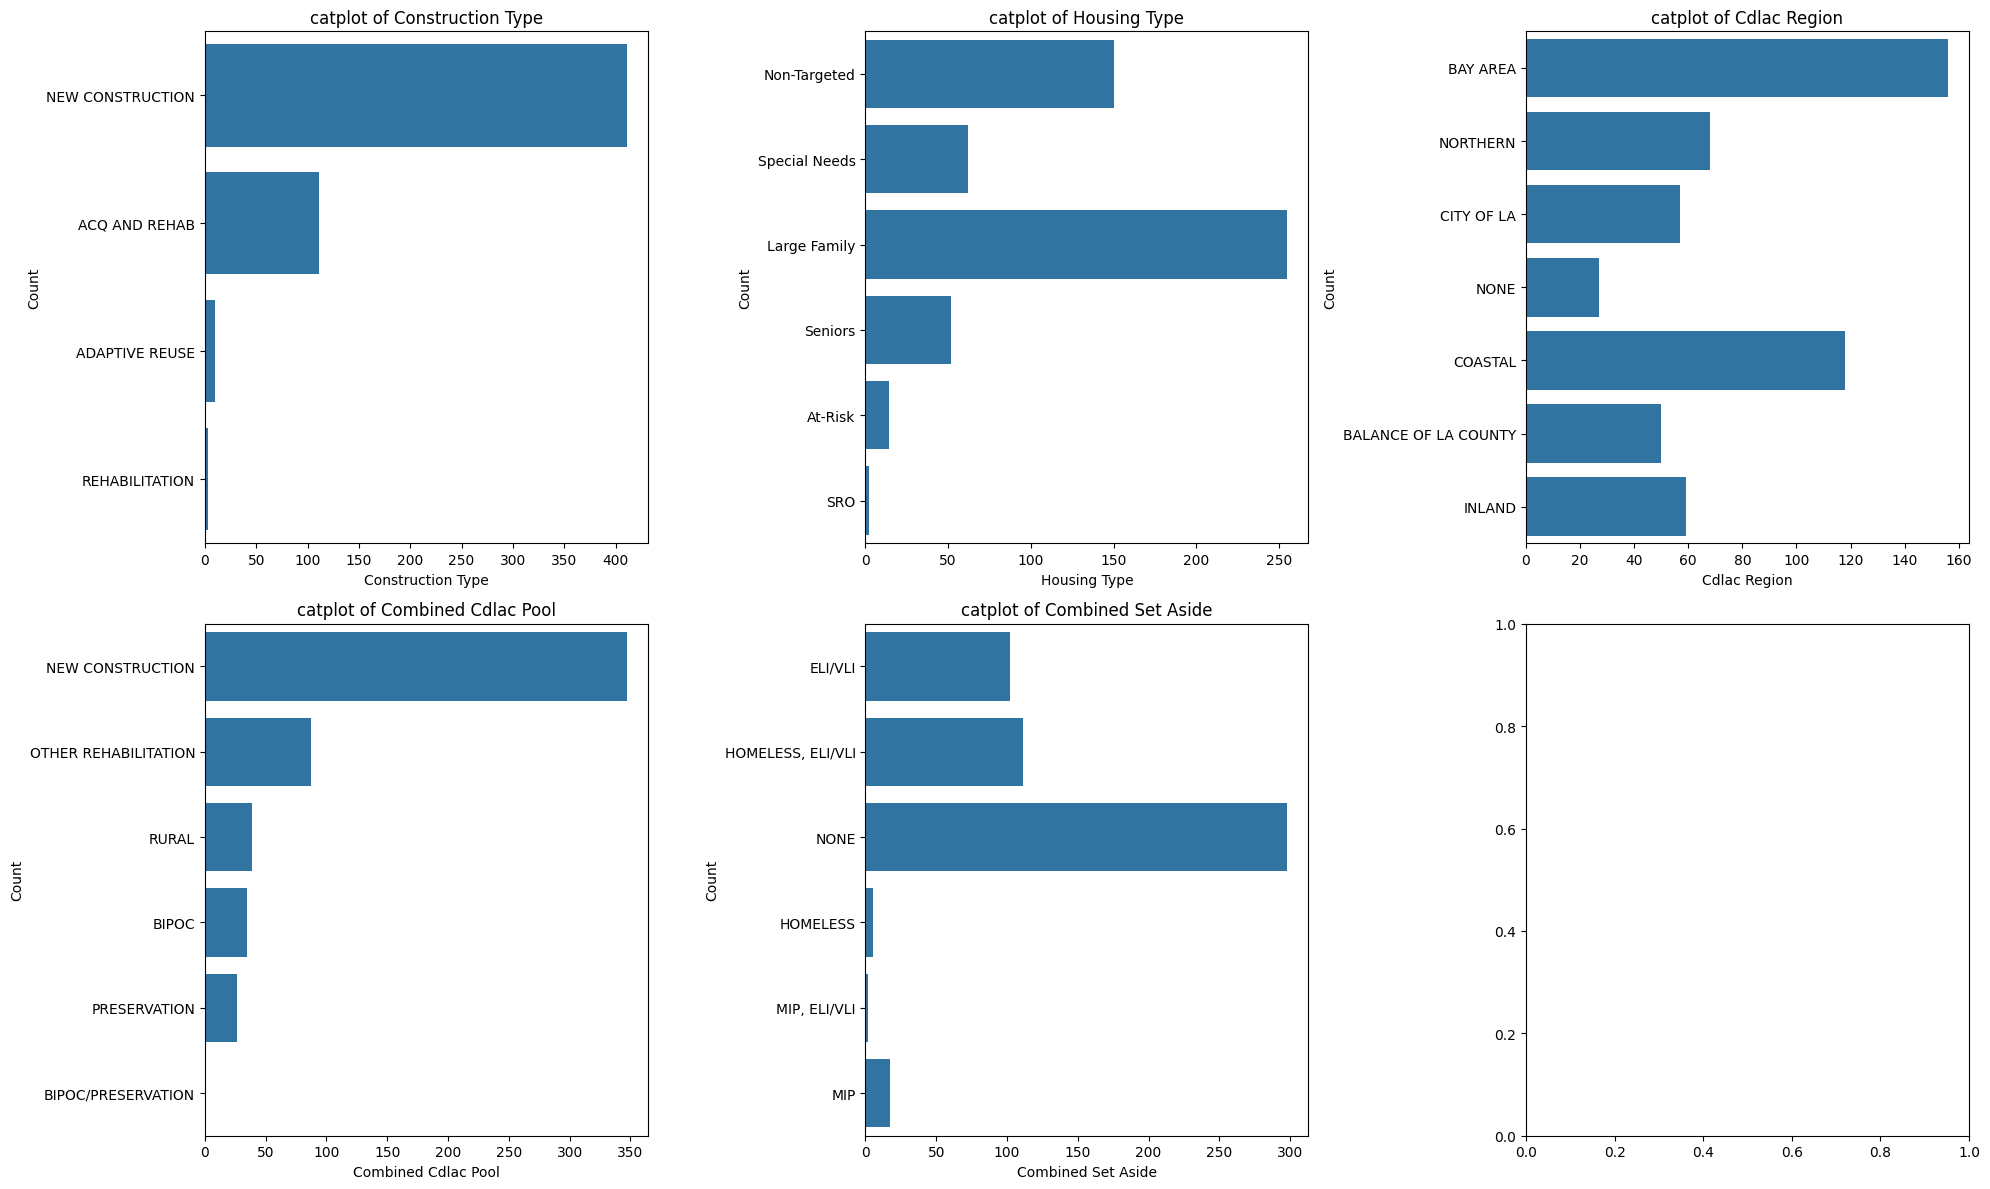

In [57]:
def plot_counts():
    # Create a figure with subplots (2 rows, 3 columns to accommodate 5 features)
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 12))

    # Flatten axes array for easier iteration (since we have 5 plots, not 6)
    axes = axes.flatten()
    # Plot a histogram for each feature
    for i, feature in enumerate(categorical):
        sb.countplot(data=df, y=feature, ax=axes[i])
        axes[i].set_xlabel(feature.replace('_', ' ').title())  # Nicer label
        axes[i].set_ylabel('Count')
        axes[i].set_title(f'catplot of {feature.replace("_", " ").title()}')
        print(df[feature].value_counts())

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Show the plot
    plt.show()
plot_counts()

## Notes on categorical data
- seems like some categories are so uncommon that is it better to adjust them? Like "MIP, ELI/VLI" in combined set aside, or "BIPOC/PRESERVATION" in combined CDLAC pool
- might be useful to combine them if they have similar meanings 
- The construction type and housing type have these clear categories defined in attachment 40, so I won't be adjusting them


In [58]:
# Define mappings for combining categories
combined_CDLAC_pool_mapping = {
    'NEW CONSTRUCTION': 'NEW CONSTRUCTION',
    'OTHER REHABILITATION': 'OTHER REHABILITATION',
    'RURAL': 'RURAL',
    'BIPOC': 'BIPOC',
    'PRESERVATION': 'PRESERVATION',
    'BIPOC/PRESERVATION': 'BIPOC'  # Map BIPOC/PRESERVATION to BIPOC
}

combined_set_aside_mapping = {
    'NONE': 'NONE',
    'HOMELESS, ELI/VLI': 'HOMELESS, ELI/VLI',
    'ELI/VLI': 'ELI/VLI',
    'MIP': 'MIP',
    'HOMELESS': 'HOMELESS',
    'MIP, ELI/VLI': 'MIP'  # Map MIP, ELI/VLI to MIP
}

# Apply mappings
df['combined_CDLAC_pool'] = df['combined_CDLAC_pool'].map(combined_CDLAC_pool_mapping)
df['combined_set_aside'] = df['combined_set_aside'].map(combined_set_aside_mapping)

construction_type
NEW CONSTRUCTION    411
ACQ AND REHAB       111
ADAPTIVE REUSE       10
REHABILITATION        3
Name: count, dtype: int64
housing_type
Large Family     255
Non-Targeted     150
Special Needs     62
Seniors           52
At-Risk           14
SRO                2
Name: count, dtype: int64
CDLAC_region
BAY AREA                156
COASTAL                 118
NORTHERN                 68
INLAND                   59
CITY OF LA               57
BALANCE OF LA COUNTY     50
NONE                     27
Name: count, dtype: int64
combined_CDLAC_pool
NEW CONSTRUCTION        347
OTHER REHABILITATION     87
RURAL                    39
BIPOC                    36
PRESERVATION             26
Name: count, dtype: int64
combined_set_aside
NONE                 298
HOMELESS, ELI/VLI    111
ELI/VLI              102
MIP                   19
HOMELESS               5
Name: count, dtype: int64


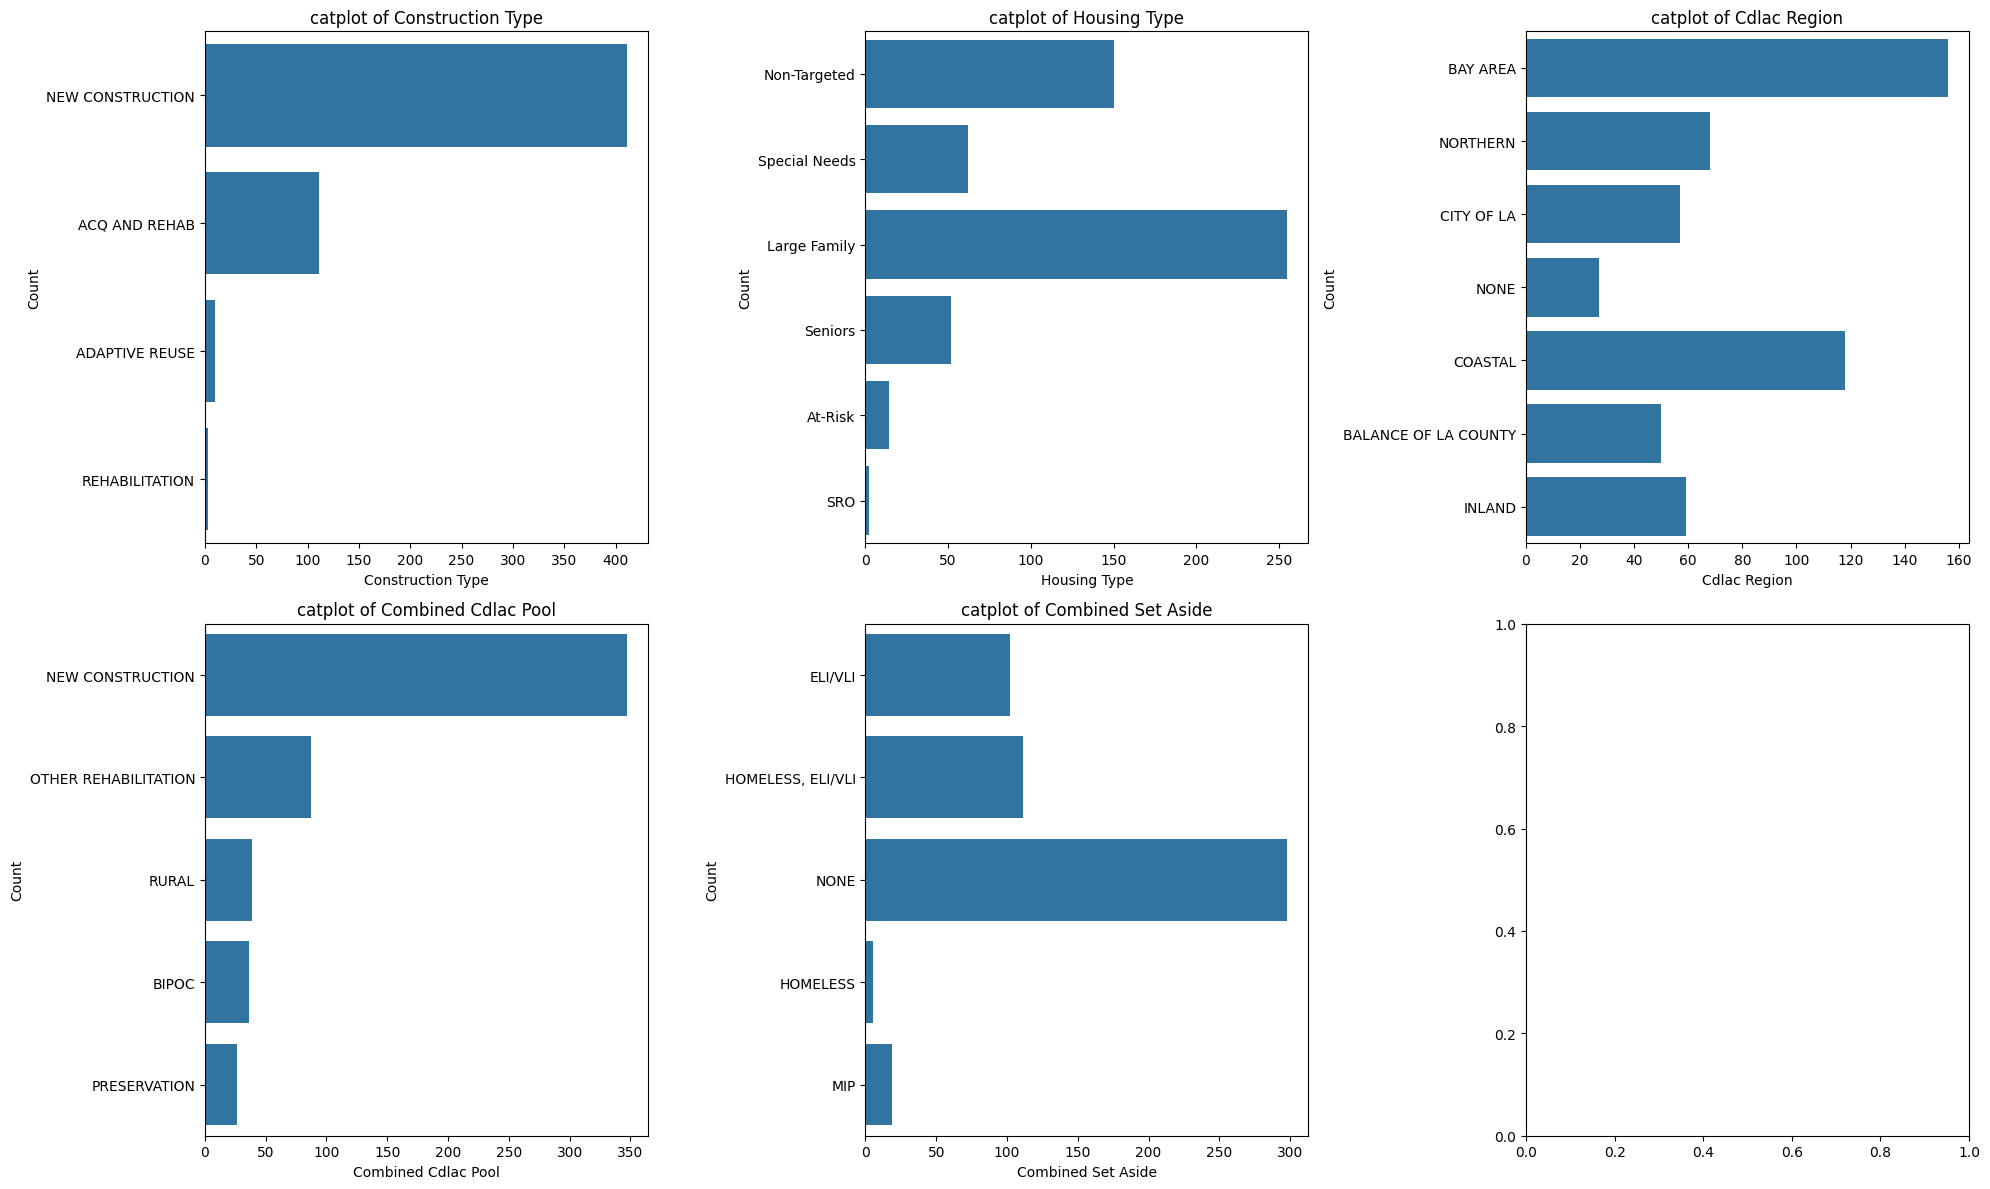

In [59]:
plot_counts()